# Analysis of EventLoggin data (simplewiki)

We collect data from the following Wikipedia event logging schemas:

- [MobileWikiAppArticleSuggestions](https://meta.wikimedia.org/wiki/Schema_talk:MobileWikiAppArticleSuggestions)
- [MobileWikiAppPageScroll](https://meta.wikimedia.org/wiki/Schema_talk:MobileWikiAppPageScroll)
- [MobileWikiAppSessions](https://meta.wikimedia.org/wiki/Schema:MobileWikiAppSessions)
- *MobileAppShareAttempts* is not used by the current Android app version


In [36]:
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MySQLdb
from tabulate import tabulate
from _mysql_exceptions import OperationalError
from IPython.display import display
from eventlogging import ELEvaluation

In [27]:
el = ELEvaluation(db_host = 'mysql', db_user = 'mediawiki', db_password = 'mediawiki', db_name = 'mediawiki')


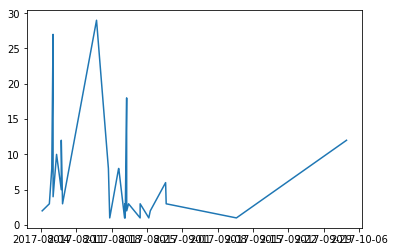

In [28]:
# Events over time
datetimes, counts = el.get_event_time_series()
plt.plot(np.array(datetimes), np.array(counts))
plt.show()

In [29]:
display(el.get_most_recommended_items())
display(el.get_most_clicked_items())
display(el.get_stats_per_source())
display(el.get_metric_stats())


,readMoreItem,views
0,United_States,15
1,Spain,9
2,Judaism,8
3,Moses,8
4,United_Kingdom,7
5,England,7
6,Airship,7
7,Madrid,6
8,Refraction,6
9,Telescope,6


,readMoreItem,clicks
0,United_States,2
1,Torah,2
2,Brandenburg_Gate,2
3,London,2
4,The_Guardian,2
5,Photography,2
6,Spain,1
7,Blimp,1
8,Bible,1
9,Shame,1


,readMoreSource,clicks,views,ctr
0,MLT,34.0,276,0.1232
1,Citolytics,35.0,261,0.1341


,_metric,count
0,users,13
1,suggestions,185


In [30]:
display(el.get_long_stats_per_source())
display(el.get_session_stats_per_source())

,readMoreSource,longClicks,avgTimeSpent,avgMaxPercentViewed
0,MLT,19.0,46.0526,97.7895
1,Citolytics,16.0,26.0625,99.8125


/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1780:08:13'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1660:57:52'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1626:47:27'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1609:14:13'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1297:32:18'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorrect time value: '1296:40:30'
  cur.execute(*args)
/opt/conda/envs/python2/lib/python2.7/site-packages/pandas/io/sql.py:1401: Warning: Truncated incorr

,readMoreSource,sessionCount,totalPages,avgTotalPages,avgLength,avgFromSearch,avgFromRandom,avgFromInternal,avgFromBack
0,MLT,43,191.0,4.4419,315.814,0.907,0.0,3.5349,0.5814
1,Citolytics,1,1.0,1.0000,27.000,0.000,0.0,0.0000,1.0000


In [64]:
# Significance test

df = el.get_stats_per_source()
df = df.set_index('readMoreSource')
df['noClicks'] = df.apply(lambda r: r['views'] * 100 - r['clicks'], axis=1)

# a: clicks, no clicks (= views - clicks)
# b: clicks, no clicks (= views - clicks
#obs = np.array([group_a, group_b])

obs = np.array([
    [df.loc['MLT', 'clicks'], df.loc['MLT', 'noClicks']],
    [df.loc['Citolytics', 'clicks'], df.loc['Citolytics', 'noClicks']],
])

#obs = np.array([[14452, 4073, 4287], [30864, 11439, 9887]])
#print(obs.shape) # 2,n
chi2, p, dof, expected = stats.chi2_contingency(obs)

#print(p) # p < 0.05

if p < 0.05:
    print('Significant at p < 0.05 (p = %f)' % p)
else:
    print('Not significant at p < 0.05 (p = %f)' % p)




Not significant at p < 0.05 (p = 0.816330)
